**Notebook enthält**
+ Anzahl der Artists und Songs, dazugehörige Verteilungen
+ Wordclouds
+ Worthäufigkeitsverteilungen nach Artist/ Genre
+ type-token-ratio
+ Durschnittstextlänge

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

### Dataexploration

In [32]:
songs = pd.read_csv("../../songs_plus_dates.csv")
songs

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,date,decades,Genre1,Genre2,number_of_tokens,number_of_types
0,0,"Andante, Andante",ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,take it easi with me pleas touch me gentli li...,easy slow andante soft light andante strong st...,"['VB', 'PRP', 'JJ', 'IN', 'PRP', '_SP', 'UH', ...",1980,1980s,Pop,Rock,260,69.0
1,1,As Good As New,ABBA,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to ...,i 'll never know whi i had to go whi i had to...,lousy rotten tough enough good new good new ne...,"['PRP', 'MD', 'RB', 'VB', 'WRB', 'PRP', 'VBD',...",1979,1970s,Pop,Rock,312,110.0
2,2,Bang-A-Boomerang,ABBA,/a/abba/bang+a+boomerang_20002668.html,making somebody happy is a question of give an...,make somebodi happi is a question of give and...,happy little sweet sweet tender dumb dumb dumb...,"['VBG', 'NN', 'JJ', 'VBZ', 'DT', 'NN', 'IN', '...",1975,1970s,Pop,Rock,198,89.0
3,3,Cassandra,ABBA,/a/abba/cassandra_20002811.html,down in the street they're all singing and sho...,down in the street they 're all sing and shou...,alive dead hollow smart sorry last sorry final...,"['IN', 'IN', 'DT', 'NN', 'PRP', 'VBP', 'DT', '...",1981,1980s,Pop,Rock,361,151.0
4,4,Chiquitita,ABBA,/a/abba/chiquitita_20002978.html,chiquitita tell me what's wrong you're encha...,chiquitita tell me what 's wrong you 're ench...,wrong own sad quiet sure new new hard sad quie...,"['NNP', '_SP', 'VB', 'PRP', 'WP', 'VBZ', 'JJ',...",1979,1970s,Pop,Rock,304,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24430,24430,Breakin Dishes,Rihanna,/r/rihanna/breakin+dishes_20421653.html,i don't know who you think i am i don't know ...,i do n't know who you think i am i do n't kno...,cool hot restless fool baby lil bit flame nigh...,"['PRP', 'VBP', 'RB', 'VB', 'WP', 'PRP', 'VBP',...",2008,2000s,Pop,Hip Hop,402,115.0
24431,24431,Get It Over With,Rihanna,/r/rihanna/get+it+over+with_21050292.html,it's dark in the day now say now don't compl...,it 's dark in the day now say now do n't comp...,dark afraid dry afraid high high high high hig...,"['PRP', 'VBZ', 'JJ', 'IN', 'DT', 'NN', '_SP', ...",2012,2010s,Pop,Hip Hop,335,73.0
24432,24432,Half Of Me,Rihanna,/r/rihanna/half+of+me_21050289.html,you saw me on the television setting fire to ...,you saw me on the televis set fire to all the...,dirty own beautiful crazy television fire idea...,"['PRP', 'VBD', 'PRP', 'IN', 'DT', 'NN', '_SP',...",2012,2010s,Pop,Hip Hop,271,92.0
24433,24433,Hate That I Love You,Rihanna,/r/rihanna/hate+that+i+love+you_20417853.html,that's how much i love you that's how much i ...,that 's how much i love you that 's how much ...,much upset mad wrong much only sad fair right ...,"['DT', 'VBZ', 'WRB', 'RB', 'PRP', 'VBP', 'PRP'...",2008,2000s,Pop,Hip Hop,416,107.0


#### explore data

In [5]:
artists = np.unique(songs.artists)
print(len(np.unique(songs.artists)))
len(songs)

272


6800

In [6]:
mean ={}
for a in artists:
    mean[a] = int(np.mean(songs.number_of_tokens[songs.artists==a]))

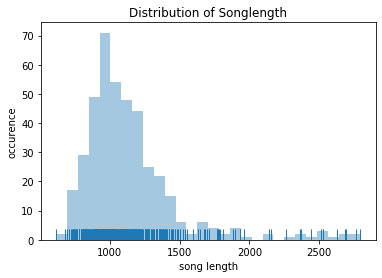

In [13]:
ax = sns.distplot(list(mean.values()), rug=True, kde=False)
ax.set_xlabel("song length")
ax.set_ylabel("occurence")
ax.set_title("Distribution of Songlength")
plt.savefig("songlength_dist")
plt.show()

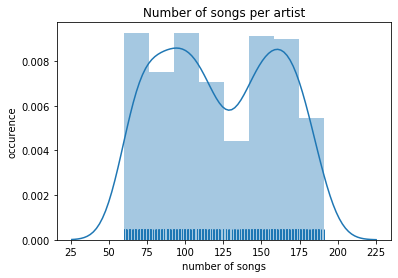

In [14]:
ax = sns.distplot(list(c.values()), rug=True)
ax.set_xlabel("number of songs")
ax.set_ylabel("occurence")
ax.set_title("Number of songs per artist")
plt.savefig("songnumber_per_artist")
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cv = CountVectorizer(max_features=2000, min_df=10, max_df=300, stop_words='english')
cv.fit(songs['stemmed_text'])

results = cv.transform(songs['stemmed_text'])

features = cv.get_feature_names()

In [29]:
df_res = pd.DataFrame(results.toarray(), columns=features)
df_res = df_res.set_index(songs.Genre1)

In [30]:
df_res.loc['sum']=df_res.sum()
df_res = df_res.div(df_res.sum(axis=1), axis=0)

In [31]:
df_res.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)
df_res

,la,ooh,ah,christma,em,music,alright,fuck,goodby,moment,...,louisiana,wink,sore,motor,social,dan,nighttim,opportun,concret,urg
Genre1,,,,,,,,,,,,,,,,,,,,,
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.382979,0.085106,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [91]:
df_res.to_csv('word_frequencies_bygenreandpos.csv')

In [92]:
df_res = pd.read_csv("word_frequencies_bygenreandpos.csv")

In [93]:
df_res = df_res.set_index(df_res.Genre1)
df_res

,Genre1,music,dead,black,body,ready,hot,round,rock,easy,...,airport,aisle,cottage,poverty,glue,ambition,bull,screamin,restaurant,lone
Genre1,,,,,,,,,,,,,,,,,,,,,
Pop,Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,Pop,0.000000,0.030303,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.034483,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,Pop,0.000000,0.020000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rock,Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.058824,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.076923,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [94]:
df_res = df_res.drop("Genre1", axis=1)
df_res

,music,dead,black,body,ready,hot,round,rock,easy,feeling,...,airport,aisle,cottage,poverty,glue,ambition,bull,screamin,restaurant,lone
Genre1,,,,,,,,,,,,,,,,,,,,,
Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.030303,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.034483,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.020000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.058824,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.076923,0.076923,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
songs[songs.Genre1=="Hip Hop"]
np.unique(songs.Genre1)

array(['Electronic', 'Folk, World, & Country', 'Funk / Soul', 'Hip Hop',
       'Jazz', 'Pop', 'Reggae', 'Rock'], dtype=object)

In [57]:
abba = df_res[df_res.index=="Funk / Soul"]
abba.loc['sum']=abba.sum()
abba = abba.div(abba.sum(axis=1), axis=0)
abba.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)
abba.head(2)

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,ooh,honey,jesu,joy,lover,darl,sad,music,anyon,babe,...,deceiv,ding,cadillac,pair,beam,press,whip,divin,hood,urg
Genre1,,,,,,,,,,,,,,,,,,,,,
Funk / Soul,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Funk / Soul,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


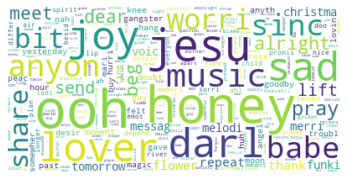

In [58]:
from wordcloud import WordCloud

def makeImage(text, figname):
    wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(figname)
    plt.show()

text = abba.loc['sum']
# text = abba.any()
makeImage(text, "wordcloud_pos_funksoul")

In [36]:
# np.unique(songs.artist)

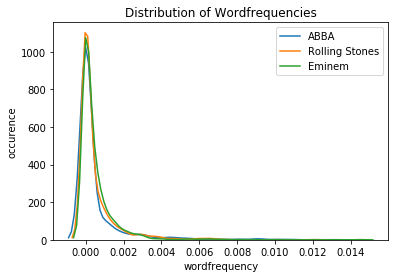

In [26]:
ax = sns.distplot(abba.loc['sum'], hist=False, label="ABBA")
ax = sns.distplot(stones.loc['sum'], hist=False, label="Rolling Stones")
ax = sns.distplot(eminem.loc['sum'], hist=False, label="Eminem")
ax.set_xlabel("wordfrequency")
ax.set_ylabel("occurence")
plt.title("Distribution of Wordfrequencies")
plt.savefig("distribution_wordfrequencies")
plt.legend()

In [37]:
# mfw = pd.read_csv("word_frequencies_bygenre.csv")
mfw = df_res.copy()
mfw = mfw.iloc[:,:31]
mfw.dropna()
# mfw = mfw.set_index(mfw.Genre1)
# mfw = mfw.drop("Genre1", axis=1)
mfw

,la,ooh,ah,christma,em,music,alright,fuck,goodby,moment,...,river,uh,lover,whoa,ladi,blow,jesu,truth,moon,mother
Genre1,,,,,,,,,,,,,,,,,,,,,
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.382979,0.085106,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.025000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Pop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.055556,0.000000,0.000000,0.000000,0.000000


In [38]:
abba = mfw[mfw.index=="Pop"]
abba.loc['sum']=abba.sum()
abba = abba.div(abba.sum(axis=1), axis=0)
# abba.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
stones = mfw[mfw.index=="Jazz"]
stones.loc['sum']=stones.sum()
stones = stones.div(stones.sum(axis=1), axis=0)
# stones.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)

In [40]:
eminem = mfw[mfw.index=="Hip Hop"]
eminem.loc['sum']=eminem.sum()
eminem = eminem.div(eminem.sum(axis=1), axis=0)
# eminem.sort_values(by=['sum'], axis=1, inplace=True, ascending=False)

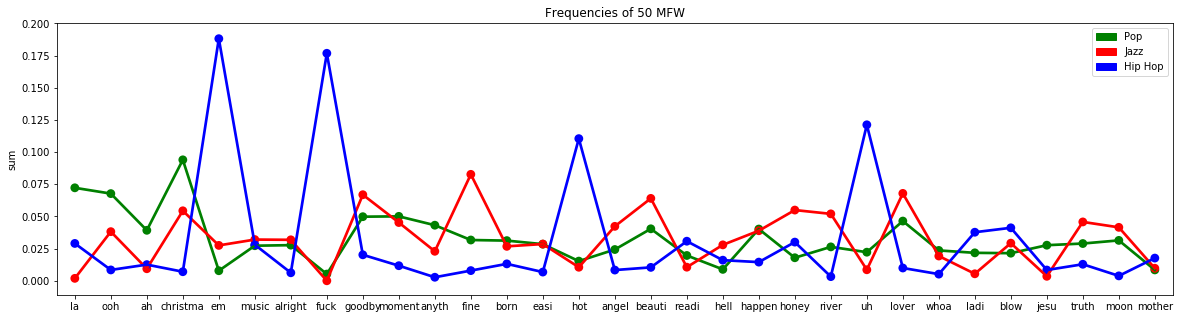

In [42]:
import matplotlib.patches as mpatches
green = mpatches.Patch(color='g', label='Pop')
red = mpatches.Patch(color='r', label='Jazz')
blue = mpatches.Patch(color='b', label='Hip Hop')


fig, ax = plt.subplots(figsize=(20,5))
ax = sns.pointplot(x=abba.columns, y=abba.loc['sum'],color='g')
ax = sns.pointplot(x=stones.columns, y=stones.loc['sum'], color='r')
ax = sns.pointplot(x=eminem.columns, y=eminem.loc['sum'], color='b')
plt.title("Frequencies of 50 MFW")
plt.legend(handles=[green, red, blue])
plt.savefig("freq_30mfw_genre")

### number of songs per genre

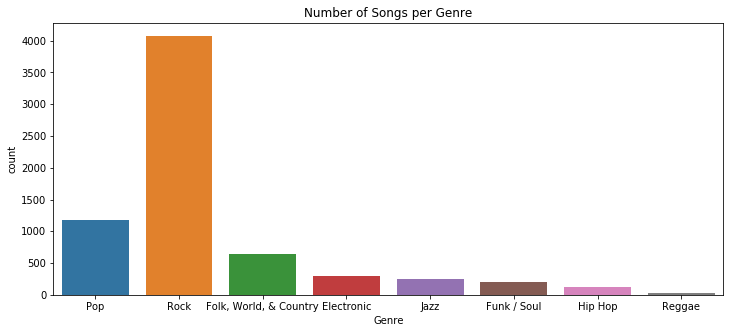

In [148]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x = songs.Genre1)
ax.set_xlabel("Genre")
plt.title("Number of Songs per Genre")
plt.savefig("songs_per_genre")

### songlength per genre

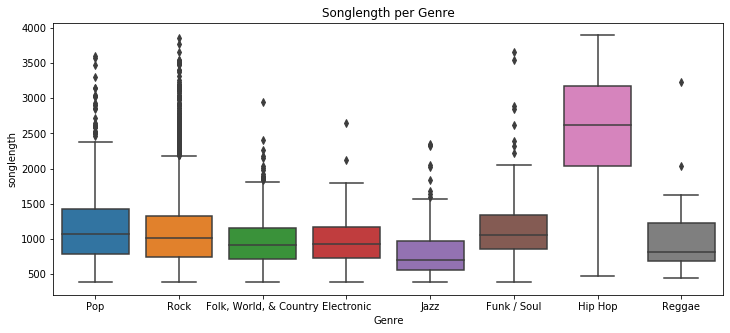

In [152]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=songs.Genre1, y=songs.number_of_tokens)
ax.set_ylabel("songlength")
ax.set_xlabel("Genre")
plt.title("Songlength per Genre")
plt.savefig("songlength_per_genre")

#### sample data

In [15]:
songs_sample = songs.copy()
songs_sample = songs_sample.sample(frac=.25, replace=False, random_state=42)
songs_sample

,artist,song,text,number_of_tokens
20468,Van Halen,Take Your Whiskey Home,"[well, my, baby, she, don't, want, me, around....",224
41605,Lil Wayne,Army Gunz,"[yeah, yeah, yeah, (i, got, army, gunz), yeah,...",578
52292,Stevie Wonder,Isn't She Lovely,"[isn't, she, lovely, isn't, she, wonderful, is...",108
42697,Mariah Carey,O Holy Night,"[o, holy, night, the, stars, are, brightly, sh...",78
27993,Clash,I'm So Bored With The U.S.A.,"[yankee, soldier, he, want, to, shoot, some, s...",113
...,...,...,...,...
25325,Billie Holiday,My Last Affair,"[can't, you, see, what, love, and, romance, ha...",97
28783,Dave Matthews Band,The Space Between,"[you, cannot, quit, me, so, quickly, is, no, h...",310
18645,Squeeze,Crying In My Sleep,"[breaking, up, is, breaking, my, heart, is, sh...",178
32684,Foo Fighters,Dear Lover,"[dear, lover, do, you, remember?, the, sound, ...",134


In [16]:
songs_sample.to_csv("sample_25percent.csv")

### type vs. token ratio

In [9]:
ohne_rock = songs.copy()
ohne_rock = ohne_rock[ohne_rock.Genre1!='Rock']
ohne_rock = ohne_rock[ohne_rock.Genre2!=' Rock']

ohne_pop_rock = ohne_rock.copy()
ohne_pop_rock = ohne_pop_rock[ohne_pop_rock.Genre1!='Pop']
ohne_pop_rock = ohne_pop_rock[ohne_pop_rock.Genre2!=' Pop']
ohne_pop_rock.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,song,date,artist,link,text,Genre1,Genre2,number_of_tokens,stemmed_text,POS,decades,number_of_types
639,639,639,639,A Fine Romance,1992,Billie Holiday,/b/billie+holiday/a+fine+romance_20017878.html,a fine romance with no kisses a fine romance...,Jazz,Blues,125,a fine romanc with no kiss a fine romanc my f...,fine fine hot cold fine fine old fine fine goo...,1990s,75.0
640,640,640,640,All Or Nothing At All,1958,Billie Holiday,/b/billie+holiday/all+or+nothing+at+all_200180...,all or nothing at all half love never appeale...,Jazz,Blues,127,all or noth at all half love never appeal to ...,half weak nothing love heart nothing nothing l...,1950s,74.0


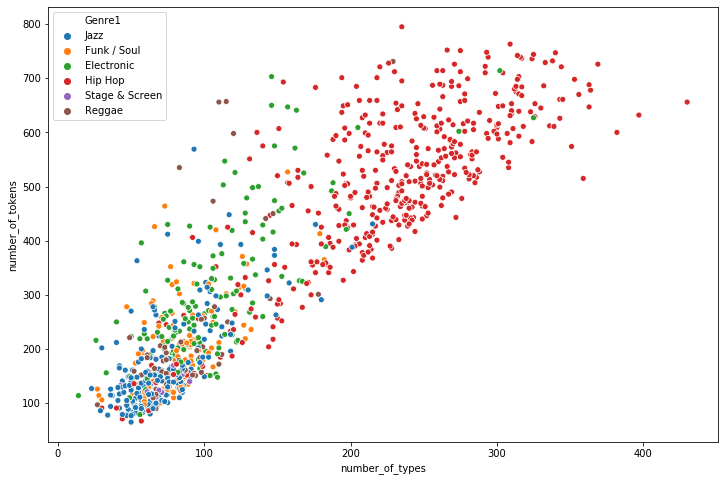

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='number_of_types', y='number_of_tokens',hue='Genre1', data=ohne_pop_rock)
plt.savefig('../../images/type_token_ratio_ohne_pop_rock')

### minimise dataset

In [33]:
mean = np.mean(songs.number_of_tokens)
mean

222.06421117249846

In [34]:
s = songs.copy()
s = s[s.number_of_tokens > mean]
s.head(2)

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,date,decades,Genre1,Genre2,number_of_tokens,number_of_types
0,0,"Andante, Andante",ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,take it easi with me pleas touch me gentli li...,easy slow andante soft light andante strong st...,"['VB', 'PRP', 'JJ', 'IN', 'PRP', '_SP', 'UH', ...",1980,1980s,Pop,Rock,260,69.0
1,1,As Good As New,ABBA,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to ...,i 'll never know whi i had to go whi i had to...,lousy rotten tough enough good new good new ne...,"['PRP', 'MD', 'RB', 'VB', 'WRB', 'PRP', 'VBD',...",1979,1970s,Pop,Rock,312,110.0


In [35]:
s.to_csv('../../songs_longtexts.csv')

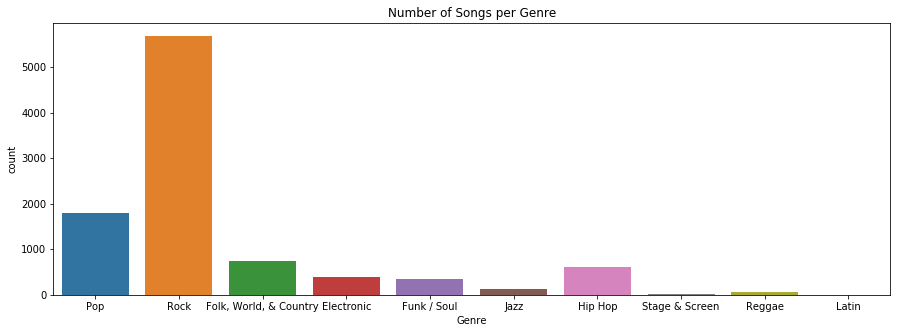

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = s.Genre1)
ax.set_xlabel("Genre")
plt.title("Number of Songs per Genre")
plt.savefig("../../images/longtexts/songs_per_genre")

In [20]:
ohne_rock = s.copy()
ohne_rock = ohne_rock[ohne_rock.Genre1!='Rock']
ohne_rock = ohne_rock[ohne_rock.Genre2!=' Rock']

ohne_pop_rock = ohne_rock.copy()
ohne_pop_rock = ohne_pop_rock[ohne_pop_rock.Genre1!='Pop']
ohne_pop_rock = ohne_pop_rock[ohne_pop_rock.Genre2!=' Pop']
ohne_pop_rock.head(2)

,song,date,artist,link,text,Genre1,Genre2,number_of_tokens,stemmed_text,POS,decades,number_of_types
646,Cheek To Cheek,1958,Billie Holiday,/b/billie+holiday/cheek+to+cheek_20017814.html,heaven i'm in heaven and my heart beats so t...,Jazz,Blues,263,heaven i 'm in heaven and my heart beat so th...,lucky much much much much heart happiness chee...,1950s,67.0
656,Gimmie A Pigfoot,2020,Billie Holiday,/b/billie+holiday/gimmie+a+pigfoot_10033262.html,wesley 'sox' wilson up in harlem every satu...,Jazz,Blues,224,wesley 'sox ' wilson up in harlem everi satur...,right full rhythm night night hop way town cor...,2020s,112.0


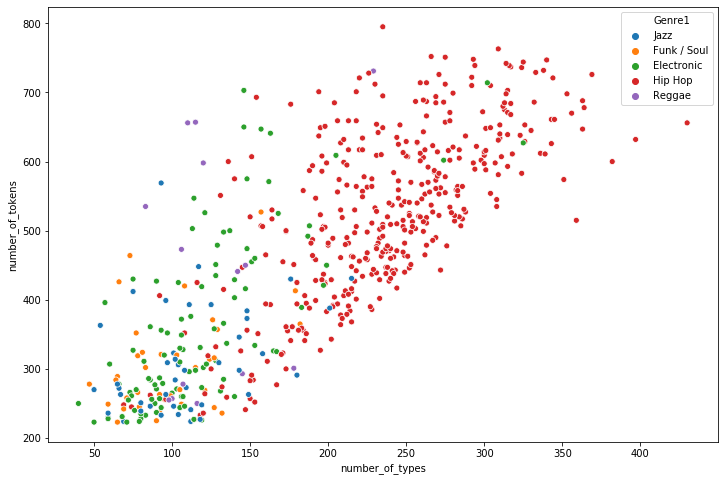

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='number_of_types', y='number_of_tokens',hue='Genre1', data=ohne_pop_rock)
plt.savefig('../../images/longtexts/type_token_ratio_ohnepoprock')

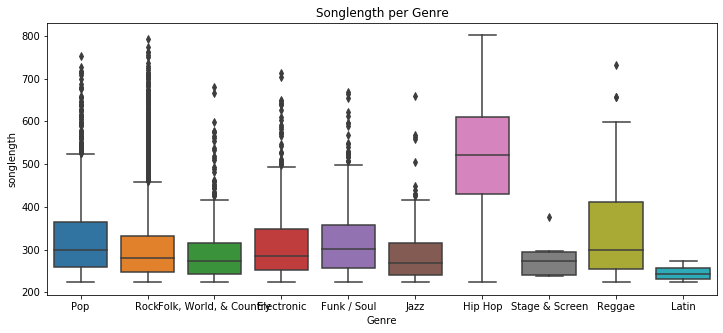

In [24]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=s.Genre1, y=s.number_of_tokens)
ax.set_ylabel("songlength")
ax.set_xlabel("Genre")
plt.title("Songlength per Genre")
plt.savefig("../../images/longtexts/songlength_per_genre")

In [30]:
counts = Counter(s.Genre2)
count = sorted(counts.items())
summe = (sum(counts.values()))

labels = []
values = []

for c in count:
    labels.append(c[0])
    values.append(float(c[1])/summe)
    
print(labels, values)

[' Blues', ' Classical', ' Electronic', ' Folk, World, & Country', ' Funk / Soul', ' Hip Hop', ' Jazz', ' Latin', ' Non-Music', ' Pop', ' Reggae', ' Rock', ' Stage & Screen'] [0.012887388769561215, 0.0015342129487572874, 0.22542702260407077, 0.03784391940267976, 0.027308990487879718, 0.04449217551396134, 0.015342129487572876, 0.00020456172650097168, 0.000613685179502915, 0.45075176434489106, 0.00010228086325048584, 0.17909379155160068, 0.0043980771197708905]


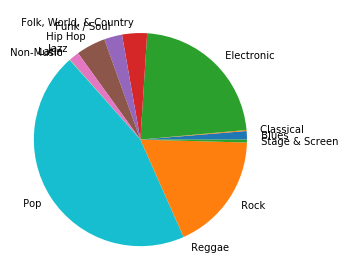

In [31]:
plt.pie(values, labels=labels, autopct=None)
plt.tight_layout()
plt.savefig("../../images/longtexts/genre2_pie")